In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Loan_Data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
data.shape

(614, 13)

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='Loan_Status'>

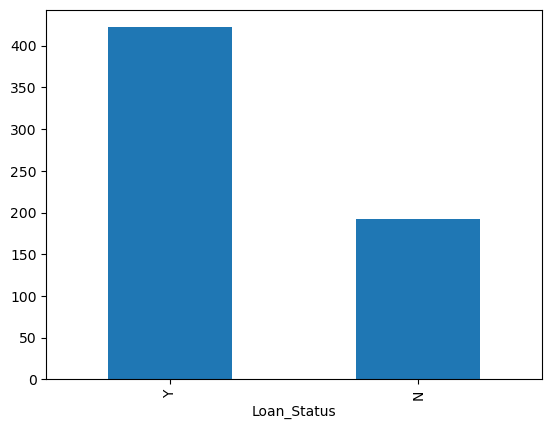

In [8]:
data['Loan_Status'].value_counts().plot.bar()

In [9]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
data.dropna(inplace = True)

In [11]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [12]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace = True)

In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0})
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [15]:
x=data.iloc[:,[9,10]].values
y=data.iloc[:,12].values
x

array([[360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   0.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [120.,   1.],
       [360.,   1.],
       [360.,   0.],
       [360.,   1.],
       [360.,   0.],
       [360.,   1.],
       [360.,   0.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   0.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   0.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,   1.],
       [360.,

In [16]:
y

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(random_state=1)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.27      0.42        33
           1       0.72      0.98      0.83        63

    accuracy                           0.74        96
   macro avg       0.81      0.63      0.63        96
weighted avg       0.78      0.74      0.69        96



In [20]:
#KNN(K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.27      0.42        33
           1       0.72      0.98      0.83        63

    accuracy                           0.74        96
   macro avg       0.81      0.63      0.63        96
weighted avg       0.78      0.74      0.69        96



In [21]:
#SVM(Support Vector Machine)
from sklearn.svm import SVC
model3=SVC(kernel="linear")
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.27      0.42        33
           1       0.72      0.98      0.83        63

    accuracy                           0.74        96
   macro avg       0.81      0.63      0.63        96
weighted avg       0.78      0.74      0.69        96



In [22]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.27      0.41        33
           1       0.72      0.97      0.82        63

    accuracy                           0.73        96
   macro avg       0.77      0.62      0.62        96
weighted avg       0.75      0.73      0.68        96



In [23]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier(random_state=1)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.69      0.33      0.45        33
           1       0.72      0.92      0.81        63

    accuracy                           0.72        96
   macro avg       0.71      0.63      0.63        96
weighted avg       0.71      0.72      0.69        96



In [24]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.69      0.27      0.39        33
           1       0.71      0.94      0.81        63

    accuracy                           0.71        96
   macro avg       0.70      0.60      0.60        96
weighted avg       0.70      0.71      0.66        96



In [52]:
logit=LogisticRegression(max_iter=10000)

C=[0.25,0.5,0.75,1,1.25,1.5,1.75,2]

scores=[]

for choice in C:
    logit.set_params(C=choice)
    logit.fit(x,y)
    scores.append(logit.score(x,y))
    print(scores)

[0.8083333333333333]
[0.8083333333333333, 0.8083333333333333]
[0.8083333333333333, 0.8083333333333333, 0.8083333333333333]
[0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333]
[0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333]
[0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333]
[0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333]
[0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333, 0.8083333333333333]
